<a href="https://colab.research.google.com/github/drfperez/lightkurve/blob/main/HOCalculus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving supernovas.csv to supernovas (8).csv
            CID     zCMB       MU         H0
0       1246275  0.24605  40.5938  56.115660
1       1246281  0.33549  41.2263  57.179491
2       1246314  0.38337  41.6383  54.047900
3       1246527  0.32078  41.1991  55.361518
4       1246529  0.49677  42.1471  55.405906
...         ...      ...      ...        ...
1824  SN2017cpu  0.05529  36.8308  71.335760
1825   SN2017hn  0.02492  35.2067  67.924858
1826   SN2017mf  0.02618  35.3916  65.534554
1827   SN2017ms  0.02538  35.3421  64.996852
1828   iPTF17dz  0.09284  38.3430  59.697457

[1829 rows x 4 columns]

Valor promedio de H0: 54.07 km/s/Mpc
Desviación estándar de H0: 7.74 km/s/Mpc


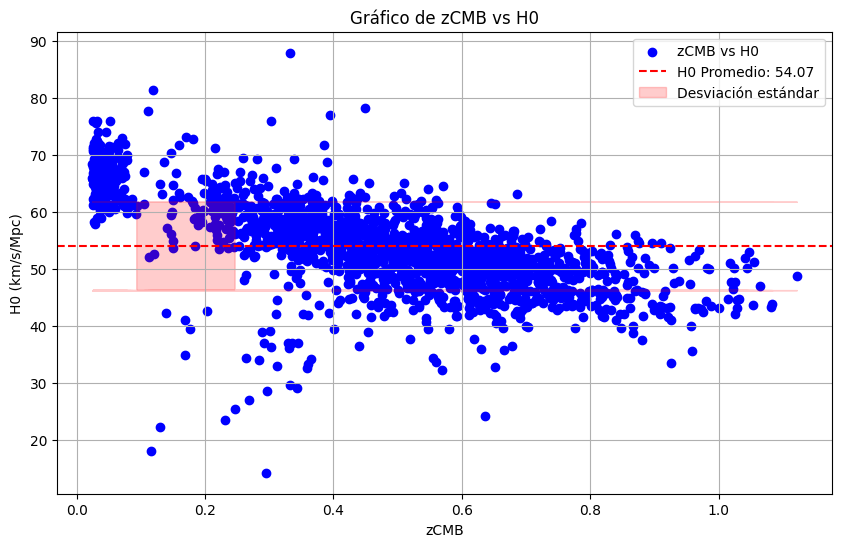

In [ ]:

# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Subir archivo CSV
uploaded = files.upload()

# Leer el archivo CSV
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Constante: velocidad de la luz en km/s
c = 299792.458

# Calcular d_L en Mpc y H_0 para cada fila
df['d_L'] = 10 ** ((df['MU'] / 5) - 5)
df['H0'] = (c * df['zCMB']) / df['d_L']

# Calcular el valor promedio y la variabilidad (desviación estándar) de H0
H0_promedio = df['H0'].mean()
H0_std = df['H0'].std()

# Mostrar las primeras filas del DataFrame, el valor promedio y la desviación estándar de H0
print(df[['CID', 'zCMB', 'MU', 'H0']])
print(f"\nValor promedio de H0: {H0_promedio:.2f} km/s/Mpc")
print(f"Desviación estándar de H0: {H0_std:.2f} km/s/Mpc")

# Crear un gráfico de zCMB vs H0
plt.figure(figsize=(10, 6))
plt.scatter(df['zCMB'], df['H0'], color='blue', label='zCMB vs H0')
plt.axhline(y=H0_promedio, color='r', linestyle='--', label=f'H0 Promedio: {H0_promedio:.2f}')
plt.fill_between(df['zCMB'], H0_promedio - H0_std, H0_promedio + H0_std, color='r', alpha=0.2, label='Desviación estándar')
plt.xlabel('zCMB')
plt.ylabel('H0 (km/s/Mpc)')
plt.title('Gráfico de zCMB vs H0')
plt.legend()
plt.grid(True)
plt.show()

Saving supernovas.csv to supernovas (14).csv
            CID     zCMB       MU         H0
0       1246275  0.24605  40.5938  56.115660
1       1246281  0.33549  41.2263  57.179491
2       1246314  0.38337  41.6383  54.047900
3       1246527  0.32078  41.1991  55.361518
4       1246529  0.49677  42.1471  55.405906
...         ...      ...      ...        ...
1824  SN2017cpu  0.05529  36.8308  71.335760
1825   SN2017hn  0.02492  35.2067  67.924858
1826   SN2017mf  0.02618  35.3916  65.534554
1827   SN2017ms  0.02538  35.3421  64.996852
1828   iPTF17dz  0.09284  38.3430  59.697457

[1829 rows x 4 columns]

Valor mitjà de H0: 54.07 km/s/Mpc
Desviació estàndard de H0: 7.74 km/s/Mpc


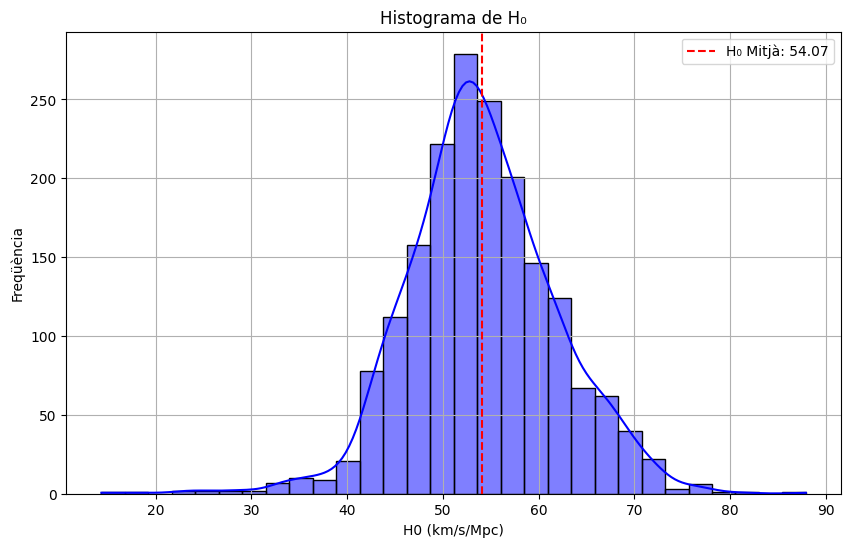

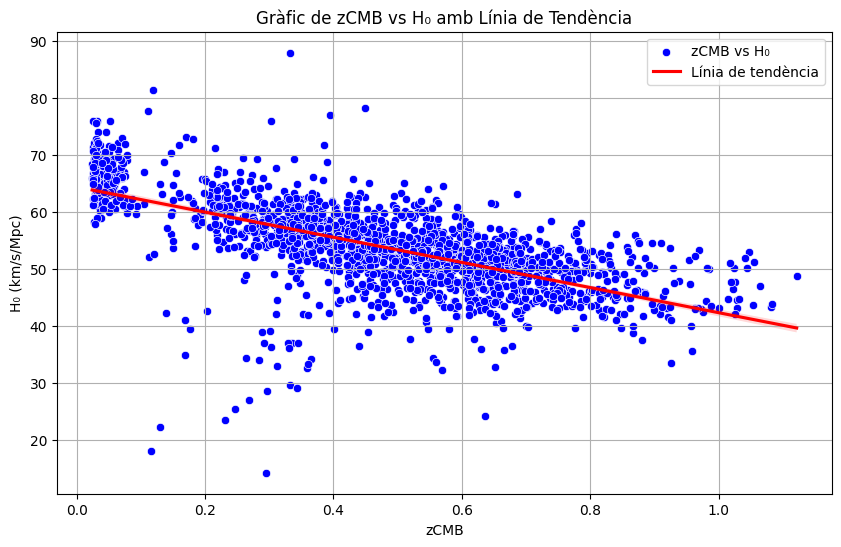

In [ ]:

# Importar les llibreries necessàries per a l'anàlisi de dades i la visualització gràfica
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Subir el fitxer CSV des de l'ordinador local al Colab
uploaded = files.upload()

# Obtenir el nom del fitxer carregat i llegir-lo com un DataFrame
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Definir la constant de la velocitat de la llum en km/s
c = 299792.458

# Calcular la lluminositat a distància (d_L) en Mpc
# d_L es calcula a partir de la modulació de distància (MU) utilitzant la fórmula: d_L = 10 ** ((MU / 5) - 5)
df['d_L'] = 10 ** ((df['MU'] / 5) - 5)

# Calcular el valor de la constant de Hubble (H₀) per a cada fila
# H₀ = (c * zCMB) / d_L
df['H0'] = (c * df['zCMB']) / df['d_L']

# Calcular el valor mitjà i la desviació estàndard de H₀
H0_promedio = df['H0'].mean()  # Valor mitjà de H₀
H0_std = df['H0'].std()        # Desviació estàndard de H₀

# Mostrar les primeres files del DataFrame amb les columnes seleccionades i els valors estadístics de H₀
print(df[['CID', 'zCMB', 'MU', 'H0']])
print(f"\nValor mitjà de H0: {H0_promedio:.2f} km/s/Mpc")
print(f"Desviació estàndard de H0: {H0_std:.2f} km/s/Mpc")

# Crear un histograma per visualitzar la distribució de H₀
plt.figure(figsize=(10, 6))
sns.histplot(df['H0'], bins=30, kde=True, color='blue')  # Histograma amb densitat de kernel
plt.axvline(H0_promedio, color='r', linestyle='--', label=f'H₀ Mitjà: {H0_promedio:.2f}')  # Línia vertical al valor mitjà
plt.xlabel('H0 (km/s/Mpc)')
plt.ylabel('Freqüència')
plt.title('Histograma de H₀')
plt.legend()
plt.grid(True)
plt.show()

# Crear un gràfic de dispersió de zCMB vs H₀ i afegir-hi una línia de tendència
plt.figure(figsize=(10, 6))
sns.scatterplot(x='zCMB', y='H0', data=df, color='blue', label='zCMB vs H₀')  # Punts de dispersió
sns.regplot(x='zCMB', y='H0', data=df, scatter=False, color='red', label='Línia de tendència')  # Línia de regressió
plt.xlabel('zCMB')
plt.ylabel('H₀ (km/s/Mpc)')
plt.title('Gràfic de zCMB vs H₀ amb Línia de Tendència')
plt.legend()
plt.grid(True)
plt.show()

Saving supernovas.csv to supernovas (15).csv
       CID     zCMB       MU         H0
0  1246275  0.24605  40.5938  56.115660
1  1246281  0.33549  41.2263  57.179491
2  1246314  0.38337  41.6383  54.047900
3  1246527  0.32078  41.1991  55.361518
4  1246529  0.49677  42.1471  55.405906

Valor mitjà de H₀: 54.07 km/s/Mpc
Desviació estàndard de H₀: 7.74 km/s/Mpc


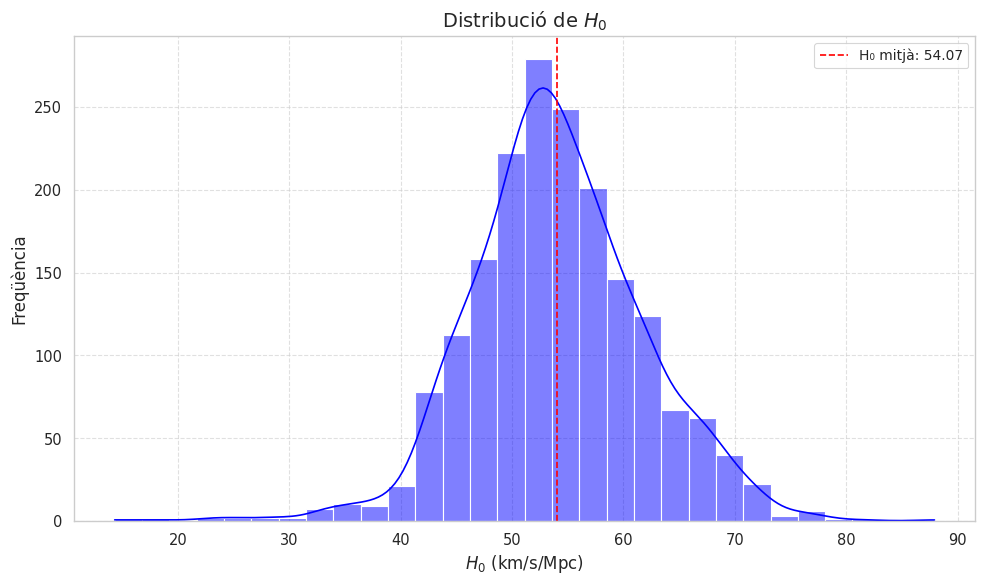

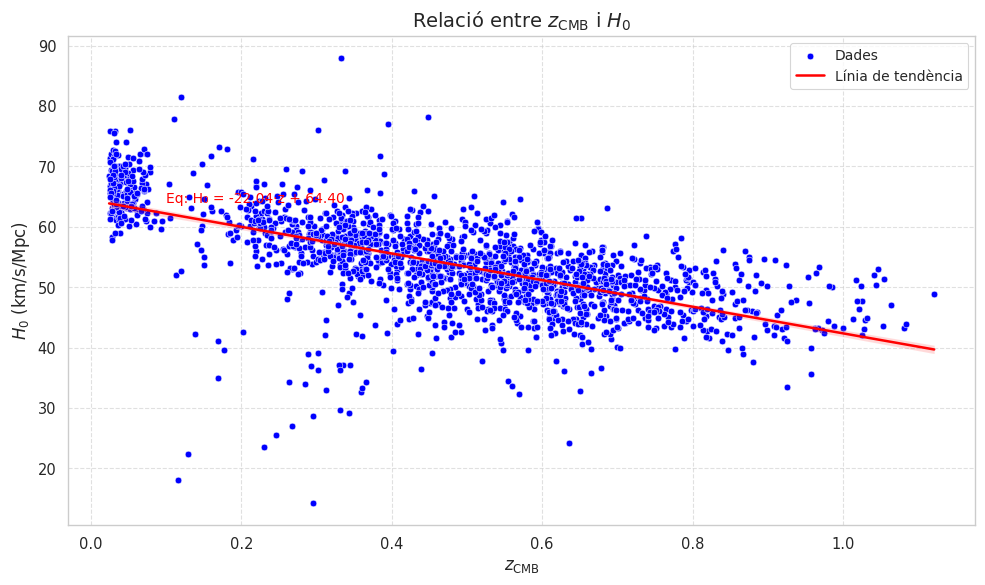

In [ ]:

# Importar les llibreries necessàries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from scipy.stats import linregress

# Configuració inicial per a gràfics
sns.set_style("whitegrid")  # Estil net
sns.set_context("paper", font_scale=1.2)  # Escala de fonts per publicació

# Carregar el fitxer CSV
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Definir constants
c = 299792.458  # Velocitat de la llum en km/s

# Calcular lluminositat a distància (d_L) en Mpc i constant de Hubble (H₀)
df['d_L'] = 10 ** ((df['MU'] / 5) - 5)  # d_L en Mpc
df['H0'] = (c * df['zCMB']) / df['d_L']  # H₀ en km/s/Mpc

# Càlculs estadístics per H₀
H0_promedio = df['H0'].mean()  # Valor mitjà de H₀
H0_std = df['H0'].std()        # Desviació estàndard de H₀

# Mostrar dades i estadístiques
print(df[['CID', 'zCMB', 'MU', 'H0']].head())
print(f"\nValor mitjà de H₀: {H0_promedio:.2f} km/s/Mpc")
print(f"Desviació estàndard de H₀: {H0_std:.2f} km/s/Mpc")

# Histograma de H₀
plt.figure(figsize=(10, 6))
sns.histplot(df['H0'], bins=30, kde=True, color='blue')
plt.axvline(H0_promedio, color='r', linestyle='--', label=f'H₀ mitjà: {H0_promedio:.2f}')
plt.xlabel(r'$H_0$ (km/s/Mpc)', fontsize=12)
plt.ylabel('Freqüència', fontsize=12)
plt.title('Distribució de $H_0$', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("histograma_H0.png", dpi=300)
plt.show()

# Gràfic de dispersió zCMB vs H₀ amb línia de tendència
# Calcular regressió lineal
slope, intercept, r_value, p_value, std_err = linregress(df['zCMB'], df['H0'])

# Crear el gràfic
plt.figure(figsize=(10, 6))
sns.scatterplot(x='zCMB', y='H0', data=df, color='blue', label='Dades')
sns.regplot(x='zCMB', y='H0', data=df, scatter=False, color='red', label='Línia de tendència')
plt.xlabel(r'$z_{\text{CMB}}$', fontsize=12)
plt.ylabel(r'$H_0$ (km/s/Mpc)', fontsize=12)
plt.title(r'Relació entre $z_{\text{CMB}}$ i $H_0$', fontsize=14)
plt.text(0.1, H0_promedio + 10, f'Eq: H₀ = {slope:.2f}·z + {intercept:.2f}', fontsize=10, color='red')
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("grafica_zCMB_vs_H0.png", dpi=300)
plt.show()

Saving supernovas.csv to supernovas (10).csv
            CID     zCMB       MU         H0
0       1246275  0.24605  40.5938  56.115660
1       1246281  0.33549  41.2263  57.179491
2       1246314  0.38337  41.6383  54.047900
3       1246527  0.32078  41.1991  55.361518
4       1246529  0.49677  42.1471  55.405906
...         ...      ...      ...        ...
1824  SN2017cpu  0.05529  36.8308  71.335760
1825   SN2017hn  0.02492  35.2067  67.924858
1826   SN2017mf  0.02618  35.3916  65.534554
1827   SN2017ms  0.02538  35.3421  64.996852
1828   iPTF17dz  0.09284  38.3430  59.697457

[1829 rows x 4 columns]

Valor promedio de H0: 54.07 km/s/Mpc
Desviación estándar de H0: 7.74 km/s/Mpc


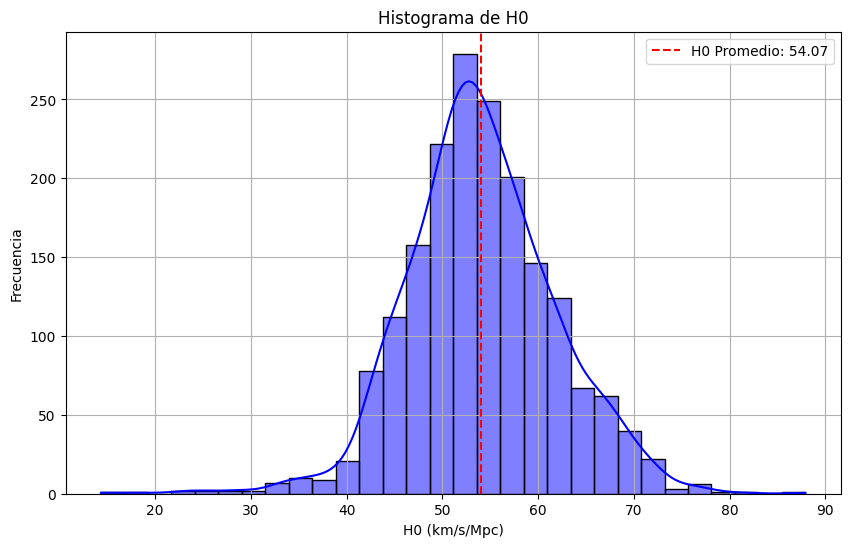

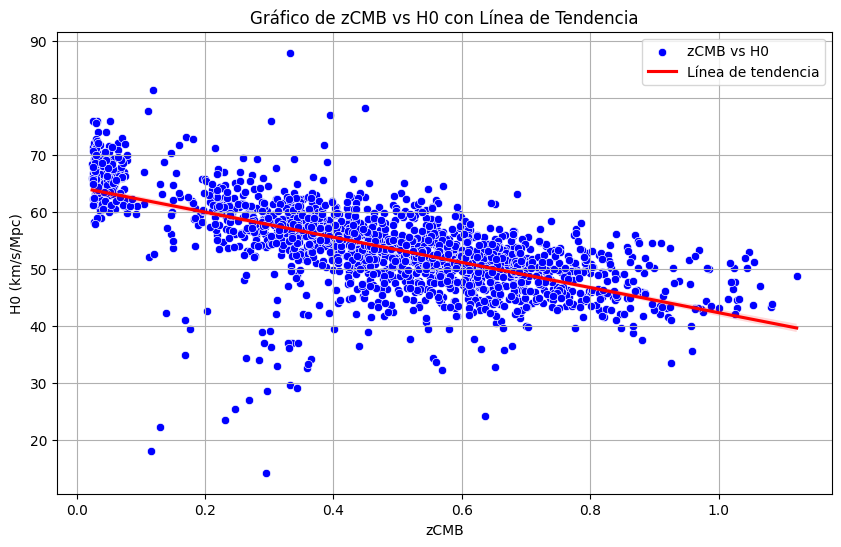

In [ ]:
#Citation DES Collaboration: T. M. C. Abbott et al 2024 ApJL 973 L14DOI 10.3847/2041-8213/ad6f9f# Importar librerías necesarias
#https://github.com/des-science/DES-SN5YR

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Subir archivo CSV
uploaded = files.upload()

# Leer el archivo CSV
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Constante: velocidad de la luz en km/s
c = 299792.458

# Calcular d_L en Mpc y H_0 para cada fila
df['d_L'] = 10 ** ((df['MU'] / 5) - 5)
df['H0'] = (c * df['zCMB']) / df['d_L']

# Calcular el valor promedio y la desviación estándar de H0
H0_promedio = df['H0'].mean()
H0_std = df['H0'].std()

# Mostrar las primeras filas del DataFrame, el valor promedio y la desviación estándar de H0
print(df[['CID', 'zCMB', 'MU', 'H0']])
print(f"\nValor promedio de H0: {H0_promedio:.2f} km/s/Mpc")
print(f"Desviación estándar de H0: {H0_std:.2f} km/s/Mpc")

# Crear un histograma de H0
plt.figure(figsize=(10, 6))
sns.histplot(df['H0'], bins=30, kde=True, color='blue')
plt.axvline(H0_promedio, color='r', linestyle='--', label=f'H0 Promedio: {H0_promedio:.2f}')
plt.xlabel('H0 (km/s/Mpc)')
plt.ylabel('Frecuencia')
plt.title('Histograma de H0')
plt.legend()
plt.grid(True)
plt.show()

# Crear un gráfico de zCMB vs H0 con línea de tendencia
plt.figure(figsize=(10, 6))
sns.scatterplot(x='zCMB', y='H0', data=df, color='blue', label='zCMB vs H0')
sns.regplot(x='zCMB', y='H0', data=df, scatter=False, color='red', label='Línea de tendencia')
plt.xlabel('zCMB')
plt.ylabel('H0 (km/s/Mpc)')
plt.title('Gráfico de zCMB vs H0 con Línea de Tendencia')
plt.legend()
plt.grid(True)
plt.show()

Constant de Hubble (H0): 67.71 ± 0.40 km/s/Mpc


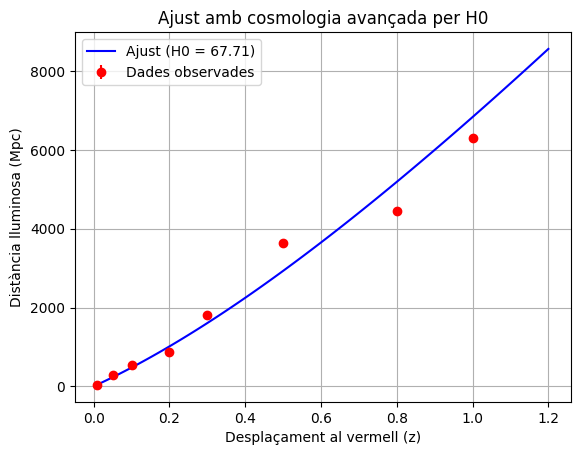

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import quad

# Constants cosmològiques
c = 3e5  # Velocitat de la llum en km/s
Omega_m = 0.3  # Densitat de matèria
Omega_lambda = 0.7  # Densitat d'energia fosca

# Funció per calcular el factor d'Hubble (1/E(z))
def E_inverse(z, Omega_m, Omega_lambda):
    """
    Factor invers de Hubble:
    E(z) = sqrt(Omega_m * (1 + z)^3 + Omega_lambda)
    """
    return 1 / np.sqrt(Omega_m * (1 + z)**3 + Omega_lambda)

# Distància lluminosa en Mpc
def distancia_lluminosa_cosmol(redshift, H0):
    """
    Distància lluminosa utilitzant la cosmologia plana:
    d_L = (c / H0) * (1 + z) * integral[0, z](dz' / E(z'))
    """
    integral, _ = quad(E_inverse, 0, redshift, args=(Omega_m, Omega_lambda))
    return (c / H0) * (1 + redshift) * integral

# Vectoritzat per treballar amb arrays
vector_distancia_lluminosa = np.vectorize(distancia_lluminosa_cosmol)

# Funció per ajustar Hubble
def ajustar_hubble(redshifts, distancies, errors=None):
    """
    Ajusta les dades per determinar H0.
    """
    popt, pcov = curve_fit(lambda z, H0: vector_distancia_lluminosa(z, H0),
                           redshifts, distancies, sigma=errors, absolute_sigma=True)
    H0_opt = popt[0]  # Valor òptim de H0
    H0_error = np.sqrt(np.diag(pcov))[0]  # Incertesa de H0
    return H0_opt, H0_error

# Dades realistes (modificades)
redshifts = np.array([0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.8, 1.0])
distancies = np.array([40.5, 275, 540, 860, 1800, 3650, 4440, 6300])# distancies = np.array([43.5, 215, 430, 860, 1300, 2150, 3440, 4300])
errors = np.array([5, 10, 15, 20, 25, 40, 60, 80])

# Ajustem les dades i calculem H0
H0, H0_error = ajustar_hubble(redshifts, distancies, errors)

# Mostrem els resultats
print(f"Constant de Hubble (H0): {H0:.2f} ± {H0_error:.2f} km/s/Mpc")

# Generem gràfics per visualitzar l'ajust
redshift_fit = np.linspace(0.01, 1.2, 100)  # Valors continus per al gràfic
distancia_fit = vector_distancia_lluminosa(redshift_fit, H0)

plt.errorbar(redshifts, distancies, yerr=errors, fmt='o', label='Dades observades', color='red')
plt.plot(redshift_fit, distancia_fit, label=f"Ajust (H0 = {H0:.2f})", color='blue')
plt.xlabel("Desplaçament al vermell (z)")
plt.ylabel("Distància lluminosa (Mpc)")
plt.title("Ajust amb cosmologia avançada per H0")
plt.legend()
plt.grid()
plt.show()